<a href="https://colab.research.google.com/github/AnushkaMishra29/CIFAR10-images-CNN-classific/blob/master/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras

Using TensorFlow backend.


In [3]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data() 

170500096/170498071 [==============================] - 6s 0us/step


In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
x_test.shape

(10000, 32, 32, 3)

In [11]:
y_train.shape

(50000, 1)

In [9]:
y_test.shape

(10000, 1)

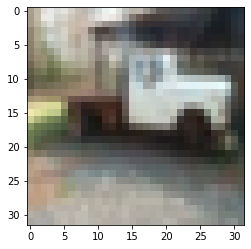

In [25]:
import matplotlib.pyplot as plt         #The %matplotlib inline tells the notebook that you wish for the image to display within the image.
# plt.imshow is a function that displays the numbered pixel values in x_train[0]to the actual image it represents.
%matplotlib inline
img = plt.imshow(x_train[6845])

In [27]:
y_train[6845] #shows us what image we are seeing. 0-airplane,1-car,2-bird,3-cat,4-deer
#5-dog,6-frog,7-horse,8-ship,9-truck

array([9], dtype=uint8)

**i.e a truck.so we are done with exploring datasets. now what we want is to learn out machine to label data from 0 to 9, since it is not a binary classification therefore we will use one hot encoding on y-train and y_test to convert it intoone hot encoding. **

In [28]:
y_train_one_hot=keras.utils.to_categorical(y_train,10)  #we have used 10 to show how many classes are there
y_test_to_one_hot=keras.utils.to_categorical(y_test,10)

In [29]:
y_train_one_hot[6845]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

i.e the truck had 9th label and after one hot encoding is converted into this.
therefore this was the processing of our labels(y), we also process our images(x) by simply normalizing the images.

In [30]:
x_train = x_train / 255
x_test = x_test / 255

In [31]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

therefore we have scaled our data between 0 and 1.


In [32]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [33]:
model = Sequential()

In [35]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [36]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

In [37]:
model.add(Dense(10, activation='softmax'))

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 32)         

In [39]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [46]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=60, 
           validation_split=0.2)      # we use validation_split intead of validation_data
#this is because we want to split our dataset into training and test set nad by usind validation_split we have appled 20% of our dataset to test set 

Train on 40000 samples, validate on 10000 samples
Epoch 1/60
40000/40000 [==============================] - 18s 447us/step - loss: 0.5414 - accuracy: 0.8120 - val_loss: 0.6778 - val_accuracy: 0.7708
Epoch 2/60
40000/40000 [==============================] - 17s 429us/step - loss: 0.5447 - accuracy: 0.8119 - val_loss: 0.6551 - val_accuracy: 0.7789
Epoch 3/60
40000/40000 [==============================] - 17s 430us/step - loss: 0.5413 - accuracy: 0.8080 - val_loss: 0.6543 - val_accuracy: 0.7826
Epoch 4/60
40000/40000 [==============================] - 18s 442us/step - loss: 0.5503 - accuracy: 0.8093 - val_loss: 0.6459 - val_accuracy: 0.7794
Epoch 5/60
40000/40000 [==============================] - 17s 431us/step - loss: 0.5313 - accuracy: 0.8136 - val_loss: 0.6734 - val_accuracy: 0.7804
Epoch 6/60
40000/40000 [==============================] - 17s 427us/step - loss: 0.5294 - accuracy: 0.8170 - val_loss: 0.6582 - val_accuracy: 0.7809
Epoch 7/60
40000/40000 [==============================] 

visualising loss with epochs on train set and validation set.
our train set as 40k examples and validation set has 10k

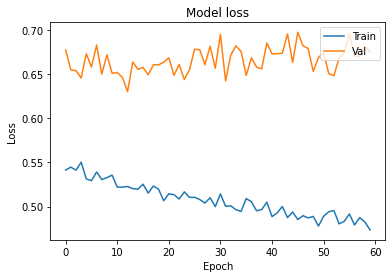

In [47]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

visualising accuracy with epochs on train set and train set

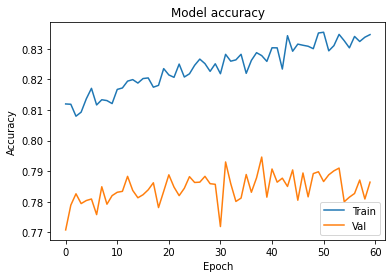

In [48]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

testing our network on any image.

In [61]:
from google.colab import files
uploaded = files.upload()

Saving cat.jpg to cat.jpg


In [62]:
my_image=plt.imread('cat.jpg')

In [63]:
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))

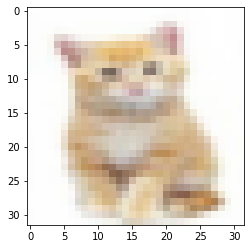

In [64]:
img = plt.imshow(my_image_resized)

In [65]:
import numpy as np


In [66]:
probabilities = model.predict(np.array( [my_image_resized,] ))

In [67]:
probabilities

array([[2.42993308e-04, 8.98523285e-06, 1.46049205e-02, 5.51856697e-01,
        3.31195304e-04, 3.78916502e-01, 4.98706736e-02, 4.40225675e-04,
        3.70039977e-03, 2.74273752e-05]], dtype=float32)

In [68]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])
print("Sixth most likely class:", number_to_class[index[4]], "-- Probability:", probabilities[0,index[4]])
print("Seventh most likely class:", number_to_class[index[3]], "-- Probability:", probabilities[0,index[3]])
print("Eigth most likely class:", number_to_class[index[2]], "-- Probability:", probabilities[0,index[2]])
print("Ninth most likely class:", number_to_class[index[1]], "-- Probability:", probabilities[0,index[1]])
print("Tenth most likely class:", number_to_class[index[0]], "-- Probability:", probabilities[0,index[0]])


Most likely class: cat -- Probability: 0.5518567
Second most likely class: dog -- Probability: 0.3789165
Third most likely class: frog -- Probability: 0.049870674
Fourth most likely class: bird -- Probability: 0.0146049205
Fifth most likely class: ship -- Probability: 0.0037003998
Sixth most likely class: horse -- Probability: 0.00044022567
Seventh most likely class: deer -- Probability: 0.0003311953
Eigth most likely class: airplane -- Probability: 0.00024299331
Ninth most likely class: truck -- Probability: 2.7427375e-05
Tenth most likely class: automobile -- Probability: 8.985233e-06
